# 1) Adding libraries

In [186]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sln

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, scale, normalize 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# 2) Read and investigate data

In [187]:
#read data
df = pd.read_csv("insurance.csv")

In [188]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [189]:
#look the shape of data
df.shape

(1338, 7)

In [190]:
#look the data infor to check whether there is any null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [191]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [192]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


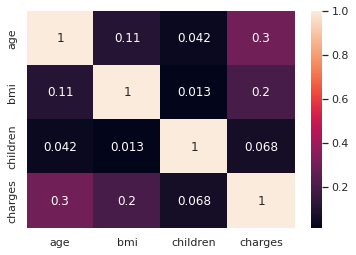

In [193]:
sns.heatmap(df.corr(), annot=True)

# 2) Exploratory Data Analysis

**a) Distribubutions of BMI**

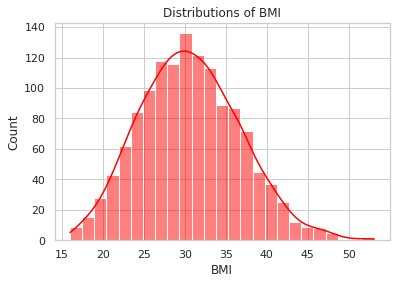

In [194]:
#use histogram plot to analyze distribution of BMI index
sns.histplot(data=df, x="bmi", kde = True, color="red");
#give a name for x-axia
plt.xlabel("BMI")
#give a name for y-axis
plt.ylabel("Count")
#give a names for graph
plt.title("Distributions of BMI")
#show graph
plt.show()

*Result: BMI index is normally distributed.*

**b) The Relationship between Smoker and Charges**

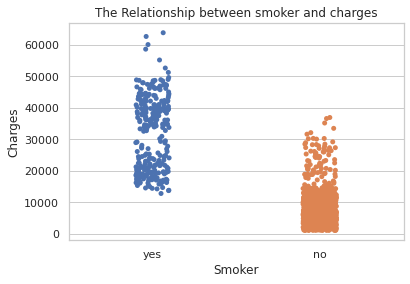

In [195]:
#use stripplot to anaylse the relationship between smoker and charges
sns.stripplot(data=df, x="smoker", y="charges");
#give a name for x-axia
plt.xlabel("Smoker")
#give a name for y-axis
plt.ylabel("Charges")
#give a names for graph
plt.title("The Relationship between smoker and charges")
#show graph
plt.show()

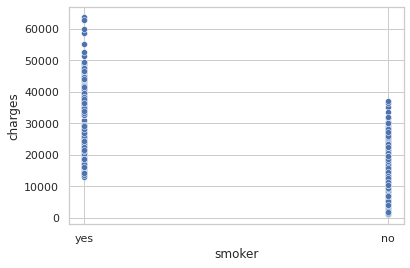

In [196]:
sns.scatterplot("smoker", "charges", data=df)
plt.xlabel("smoker")
plt.ylabel("charges")
plt.show()

*Result: Smoking people have more charges than non-smoking people*

**c) The Relationship between Smoker and Region**

region
northeast    67
northwest    58
southeast    91
southwest    58
dtype: int64


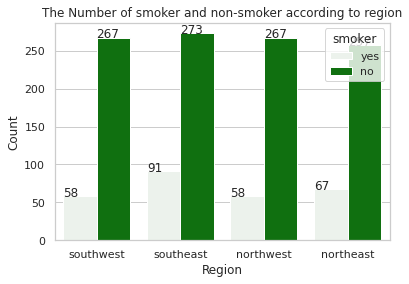

In [197]:
smoker_values = df.query("smoker == 'yes'")
smoker_counts = smoker_values.groupby("region").size()
print(smoker_counts)
region = ('Northeast', 'Northwest', 'Southeast', 'Southwest')
ax = sns.countplot(x='region', data=df, hue = "smoker", color=("green"));
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
  crosstab_result = pd.crosstab(index=df["region"], columns=df["smoker"])
#give a name for x-axis
plt.xlabel("Region")
#give a name for y-axis
plt.ylabel("Count")
#give a names for graph
plt.title("The Number of smoker and non-smoker according to region")
#show graph
plt.show()

*Result: The number of smokers are approximately the same in each region.The maxmimum people who are bon-smoker live in Southeast.The maximum smoker live in Southeast.*

**d) The Relationship between Smoker and Sex**

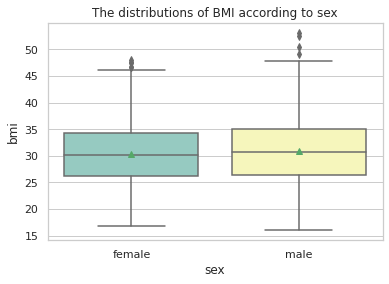

In [198]:
#use boxplotto analyze relationship betweeen smoker and bmi index
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="sex", y="bmi", data=df, showmeans=True, palette="Set3")
#give a names for graph
plt.title("The distributions of BMI according to sex")
#show graph
plt.show()


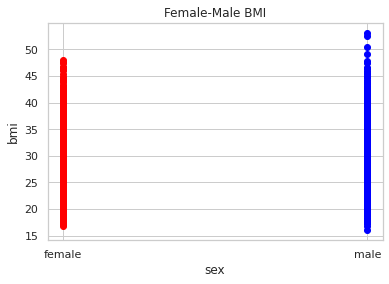

In [199]:
plt.scatter(x=df[df["sex"] == "female"]["sex"], y=df[df["sex"] == "female"]["bmi"], color="red")
plt.scatter(x=df[df["sex"] == "male"]["sex"], y=df[df["sex"] == "male"]["bmi"], color="blue")

plt.xlabel("sex")
plt.ylabel("bmi")
plt.title("Female-Male BMI")
plt.show()

*The average of the females' BMI and males' BMI are approximately same. Then, sex is not a meaningul feature for BMI.*

**e) Regions where have most children**

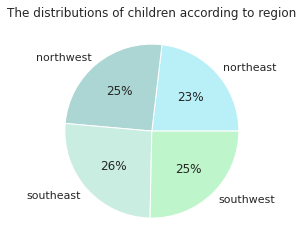

In [200]:
#define the distributions of children according to region by using pie chart
df_children = df[["region", "children"]].groupby(["region"]).sum()
colors = ["#B9EFF7", "#ABD6D3", "#CAEDE2", "#BFF5CB"]
plt.pie(df_children.children, 
        colors=colors, 
        labels=df_children.index, 
        autopct = '%0.0f%%')
#give a names for graph
plt.title("The distributions of children according to region")
#show graph
plt.show()

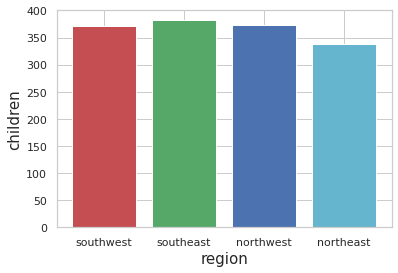

In [201]:
df["children"].sort_values().unique()
sw = df[df["region"] == "southwest"]["children"].sum()
se = df[df["region"] == "southeast"]["children"].sum()
nw = df[df["region"] == "northwest"]["children"].sum()
ne = df[df["region"] == "northeast"]["children"].sum()
plt.bar(x = ["southwest","southeast","northwest","northeast"],height = [sw,se,nw,ne], color=['r', 'g', 'b', 'c'])

plt.xlabel("region", fontsize = 15)
plt.ylabel("children", fontsize = 15)
plt.show()

*Result: The most children live in southeast.*

**f) The Relationship Between BMI and age**

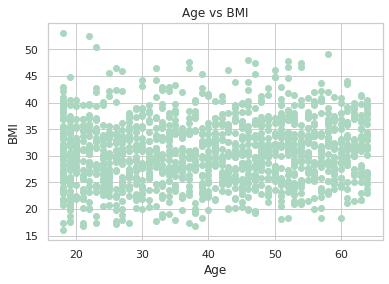

In [202]:
plt.scatter(x=df["age"], y=df["bmi"], color= "#ABD6BF")
#give a name for x-axis
plt.xlabel("Age")
#give a name for y-axis
plt.ylabel("BMI")
#give a names for graph
plt.title("Age vs BMI")
#show graph
plt.show()

In [203]:
data = df[["age","bmi"]].sort_values(by="age")
average_ages = [data[data["age"] == i]["bmi"].mean() for i in data["age"].unique()]
average_ages

[31.326159420289855,
 28.596911764705883,
 30.63275862068966,
 28.185714285714283,
 31.08767857142857,
 31.45446428571429,
 29.142678571428576,
 29.693928571428568,
 29.428928571428575,
 29.333571428571425,
 29.482142857142854,
 29.38314814814815,
 30.55759259259259,
 29.918333333333333,
 31.597692307692306,
 31.163076923076922,
 30.27403846153846,
 31.3948,
 29.374200000000002,
 31.2166,
 28.996599999999997,
 29.9102,
 30.139074074074074,
 31.50685185185185,
 30.32814814814815,
 30.204444444444444,
 30.844259259259257,
 29.778965517241378,
 31.340862068965517,
 30.664310344827587,
 31.925689655172416,
 30.313928571428573,
 31.13224137931035,
 31.72706896551724,
 32.93603448275862,
 30.360892857142858,
 31.234285714285715,
 31.950000000000006,
 31.60096153846154,
 30.84442307692308,
 32.718199999999996,
 30.572000000000003,
 30.33282608695652,
 32.54826086956522,
 32.34260869565217,
 31.92347826086956,
 32.97613636363637]

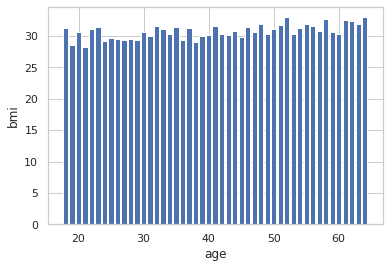

In [204]:
plt.bar(data["age"].unique(),average_ages)
plt.xlabel("age")
plt.ylabel("bmi")
plt.show()

*Result: There is a weak correlation between BMI and sex.*

*g) The Relationship between BMI and children*

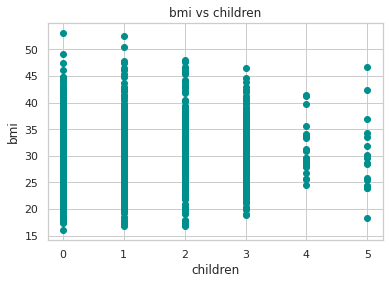

In [205]:
plt.scatter(df['children'], df['bmi'], color="#008F8C")
#give a name for x-axis
plt.xlabel('children')
#give a name for y-axis
plt.ylabel('bmi')
#give a names for graph
plt.title("bmi vs children")
#show graph
plt.show()

*Result: There is a weak correlation between BMI and children.*

**h) Outliers**

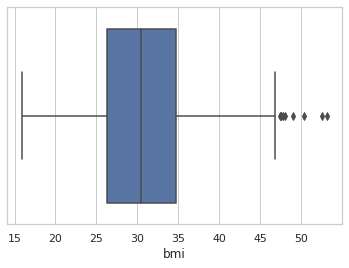

In [206]:
#investigate the outliers on the graph
bmi = df["bmi"]
sns.boxplot(x = bmi)

In [207]:
#find lower and upper bound
Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower_bound =", str(lower_bound))
print("upper_bound =", str(upper_bound))
print(Q1)
print(Q3)

lower_bound = 13.7
upper_bound = 47.290000000000006
26.29625
34.69375


In [208]:
#find the outlier velues
outliers = df.query(f" bmi < {lower_bound} | bmi > {upper_bound}")['bmi'].sort_values()
print(outliers)

543     47.41
401     47.52
860     47.60
1088    47.74
286     48.07
116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


*Result: There are outliers in this data set. These outliers are given the top line.*

**i) The relationship bwtween BMI and charges**

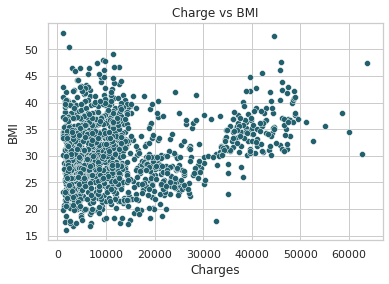

In [209]:
sns.scatterplot(data=df, x="charges", y="bmi", color= "#23606E")
#give a name for x-axis
plt.xlabel("Charges")
#give a name for y-axis
plt.ylabel("BMI")
#give a names for graph
plt.title("Charge vs BMI")
#show graph
plt.show()


**j) Investigate the relationship between region, smoker and BMI in bar graph**

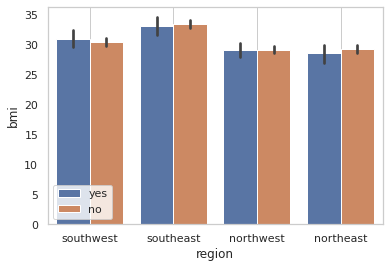

In [210]:
#Create a bar chart with the data "smoker" and "bmi"
ax = sns.barplot(x='region', y='bmi', hue = "smoker", data = df);
#Add a legend
plt.legend()
#Add grid lines
plt.grid()
#Display the chart
plt.show()

*Result: Southeast region's smoking and non-smoking people have most BMI.*

# 4) Data Preprocessing

In [211]:
#Check the DataFrame for missing values
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [212]:
#Drop the duplicates
df.drop_duplicates(inplace=True)
#Reset the indexes
df.reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [213]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [215]:
#Create an labelEnconder object
encoder= LabelEncoder()
#Encode the smoker and sex ccolumns
df["smoker"] = encoder.fit_transform(df["smoker"])
df["sex"] = encoder.fit_transform(df["sex"])
#one-hot encoding for region
df = pd.get_dummies(df, prefix = "region", columns = ["region"], drop_first = True)

In [216]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [217]:
#Sprit X as fatures and Y as target
X = df.drop(columns=["charges"])
Y = df[["charges"]]

In [218]:
# Split the dataset into train and test sets with 80-20 ratio
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.2)

**d) Normalizing**

In [219]:
scale_cols = ["age", "bmi", "children"]
scaler = MinMaxScaler()
train = scaler.fit_transform(X_train[scale_cols])
test = scaler.transform(X_test[scale_cols])
X_train[scale_cols] = train
X_test[scale_cols] = test
x = scaler.fit_transform(X[scale_cols])
X[scale_cols] = x

In [220]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [221]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1069, 8)
(1069, 1)
(268, 8)
(268, 1)


# 5) Selecting a Model

In [222]:
#import libraries 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

**a) Training the data by using linear regression, K-NN, random fores, SVR, xgb and decision tree**

In [223]:
# LinearRegression
l_m= LinearRegression()
l_m.fit(X_train, Y_train)

# K-NN
knn_m = KNeighborsRegressor()
knn_m.fit(X_train, Y_train)

# Random forest
rfr_m = RandomForestRegressor()
rfr_m.fit(X_train, Y_train)

#SVR
svr_m = SVR().fit(X_train, Y_train)

#xgb
xgb_m = XGBRegressor(objective="reg:squarederror")
xgb_m.fit(X_train, Y_train)

#Decision Tree
tree_m = DecisionTreeRegressor()
tree_model = tree_m.fit(X_train, Y_train)


In [224]:
# Predict the linear regession

lm_pred = l_m.predict(X_test)

# Predictthe k-NN
knn_pred = knn_m.predict(X_test)

# Predict the RFR
rfr_pred = rfr_m.predict(X_test)

#Predict SVR
svr_pred = svr_m.predict(X_test)

#Predict xgb
xgb_pred = xgb_m.predict(X_test)

#prediction decision tree
tree_pred = tree_m.predict(X_test)

**b) Cross Validation**

In [225]:
score_lr = cross_val_score(l_m, X, Y, cv=5).mean()
score_knn = cross_val_score(knn_m, X, Y, cv=5).mean()
score_rfr = cross_val_score(rfr_m, X, Y.values.ravel(), cv=5).mean()
score_svr = cross_val_score(svr_m, X, Y, cv=5).mean()
score_xgb = cross_val_score(xgb_m, X, Y, cv=5).mean()
score_tree = cross_val_score(tree_m, X, Y, cv=5).mean()


In [226]:
print("Linear Regression:", score_lr)
print("k-NN:", score_knn)
print("Random Forest:", score_rfr)
print("SVR:", score_svr)
print("XGB:", score_xgb)
print("Decision Tree:", score_tree)

Linear Regression: 0.7467384760760104
k-NN: 0.7592517402282105
Random Forest: 0.8364295150120442
SVR: -0.10015484740942152
XGB: 0.8572527957211771
Decision Tree: 0.7027749202905292


Text(0.5, 1.0, 'the validation score of the models')

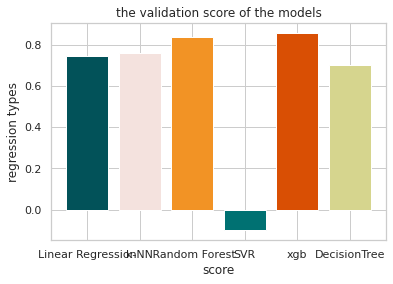

In [227]:
a = ("Linear Regression", "k-NN"," Random Forest", "SVR", "xgb", "DecisionTree")
b = (score_lr, score_knn, score_rfr, score_svr, score_xgb, score_tree)
colors = ("#025259", "#F4E2DE", "#F29325", "#007172", "#D94F04", "#D6D58E")
plt.bar(a, b, color=colors)
plt.xlabel("score")
plt.ylabel("regression types")
plt.title("the validation score of the models")

*Result: xgb model is choosed becuase of having the highest validation score.*

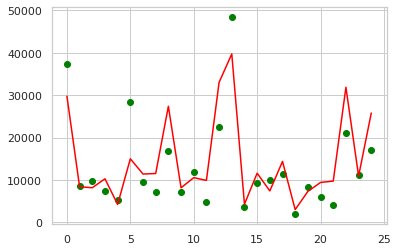

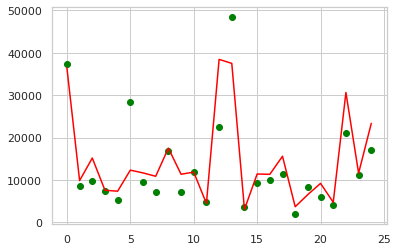

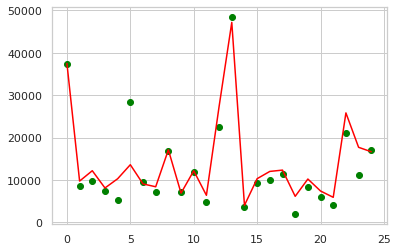

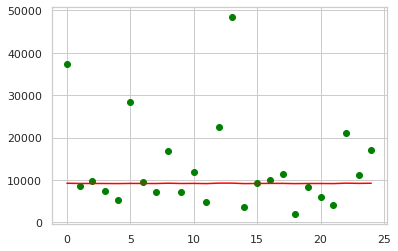

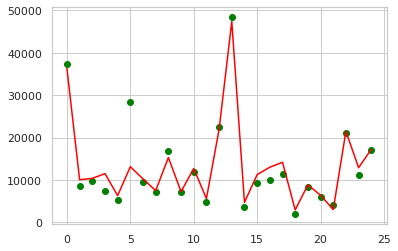

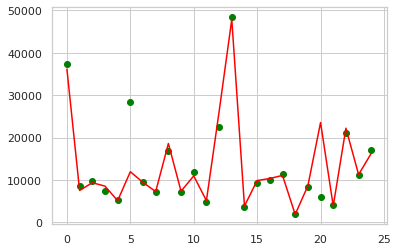

In [228]:
plt.scatter(range(25), Y_test[:25], c="green")
plt.plot(range(25), lm_pred[:25], c="red")
plt.show()

plt.scatter(range(25), Y_test[:25], c="green")
plt.plot(range(25), knn_pred[:25], c="red")
plt.show()

plt.scatter(range(25), Y_test[:25], c="green")
plt.plot(range(25), rfr_pred[:25], c="red")
plt.show()

plt.scatter(range(25), Y_test[:25], c="green")
plt.plot(range(25), svr_pred[:25], c="red")
plt.show()

plt.scatter(range(25), Y_test[:25], c="green")
plt.plot(range(25), xgb_pred[:25], c="red")
plt.show()

plt.scatter(range(25), Y_test[:25], c="green")
plt.plot(range(25), tree_pred[:25], c="red")
plt.show()

**6) Hyperparameter Optimization**

In [229]:
parameters = {'nthread':[4],
              'objective':['reg:squarederror'],
              'learning_rate': [.02],
              'max_depth': [3],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [275],
              'reg_alpha': [1.15],
              'reg_lambda': [1.35],}
xgb_grid = GridSearchCV(xgb_m, 
                        param_grid=parameters,
                        cv=3,
                        n_jobs=5,
                        verbose=True)
xgb_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=XGBRegressor(objective='reg:squarederror'),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.02],
                         'max_depth': [3], 'min_child_weight': [4],
                         'n_estimators': [275], 'nthread': [4],
                         'objective': ['reg:squarederror'], 'reg_alpha': [1.15],
                         'reg_lambda': [1.35], 'subsample': [0.7]},
             verbose=True)

In [230]:
print(xgb_grid.best_score_)

0.8593013562946155


In [231]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.02,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 275,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'reg_alpha': 1.15,
 'reg_lambda': 1.35,
 'subsample': 0.7}

# 7) Evaluating the model

In [232]:
print(f"""
    XGBRegressor
    R2 Score: {r2_score(Y_test, xgb_pred)}
    MSE: {mean_squared_error(Y_test, xgb_pred)}
    RMSE: {(mean_squared_error(Y_test, xgb_pred)) ** 0.5}
    MAE: {mean_absolute_error(Y_test, xgb_pred)}
    RMAE: {(mean_absolute_error(Y_test, xgb_pred)) ** 0.5}
    MSLE: {mean_squared_log_error(Y_test, xgb_pred)}
    RMSLE: {(mean_squared_log_error(Y_test, xgb_pred)) ** 0.5}
""")


    XGBRegressor
    R2 Score: 0.8318492229417934
    MSE: 23428210.979209047
    RMSE: 4840.269721741656
    MAE: 2703.9427061348533
    RMAE: 51.999449094532274
    MSLE: 0.1614662279886752
    RMSLE: 0.40182860523944186

